In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input,LSTM
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,matthews_corrcoef, precision_recall_curve, auc , cohen_kappa_score
import time
import joblib
import os

In [6]:
data_set = pd.read_csv("spambase.csv")

In [7]:
# Data Overview
print("Dataset Shape:", data_set.shape)
print(data_set.info())

Dataset Shape: (4601, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_fr

In [8]:
print(data_set.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [9]:
data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
data_set.isna().any().any()
#No Nulls

False

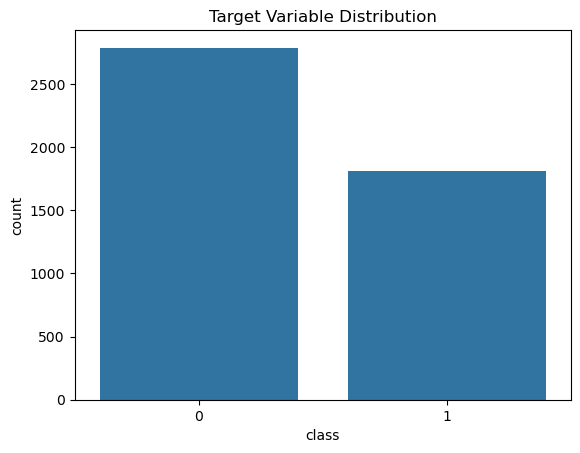

In [11]:
#Target variable distribution
sns.countplot(x='class', data=data_set)
plt.title("Target Variable Distribution")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# 1. Identify Categorical Columns
categorical_columns = data_set.select_dtypes(include=['object']).columns.tolist()


# 2. Loop through each column and apply Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    data_set[col] = le.fit_transform(data_set[col])

<Axes: >

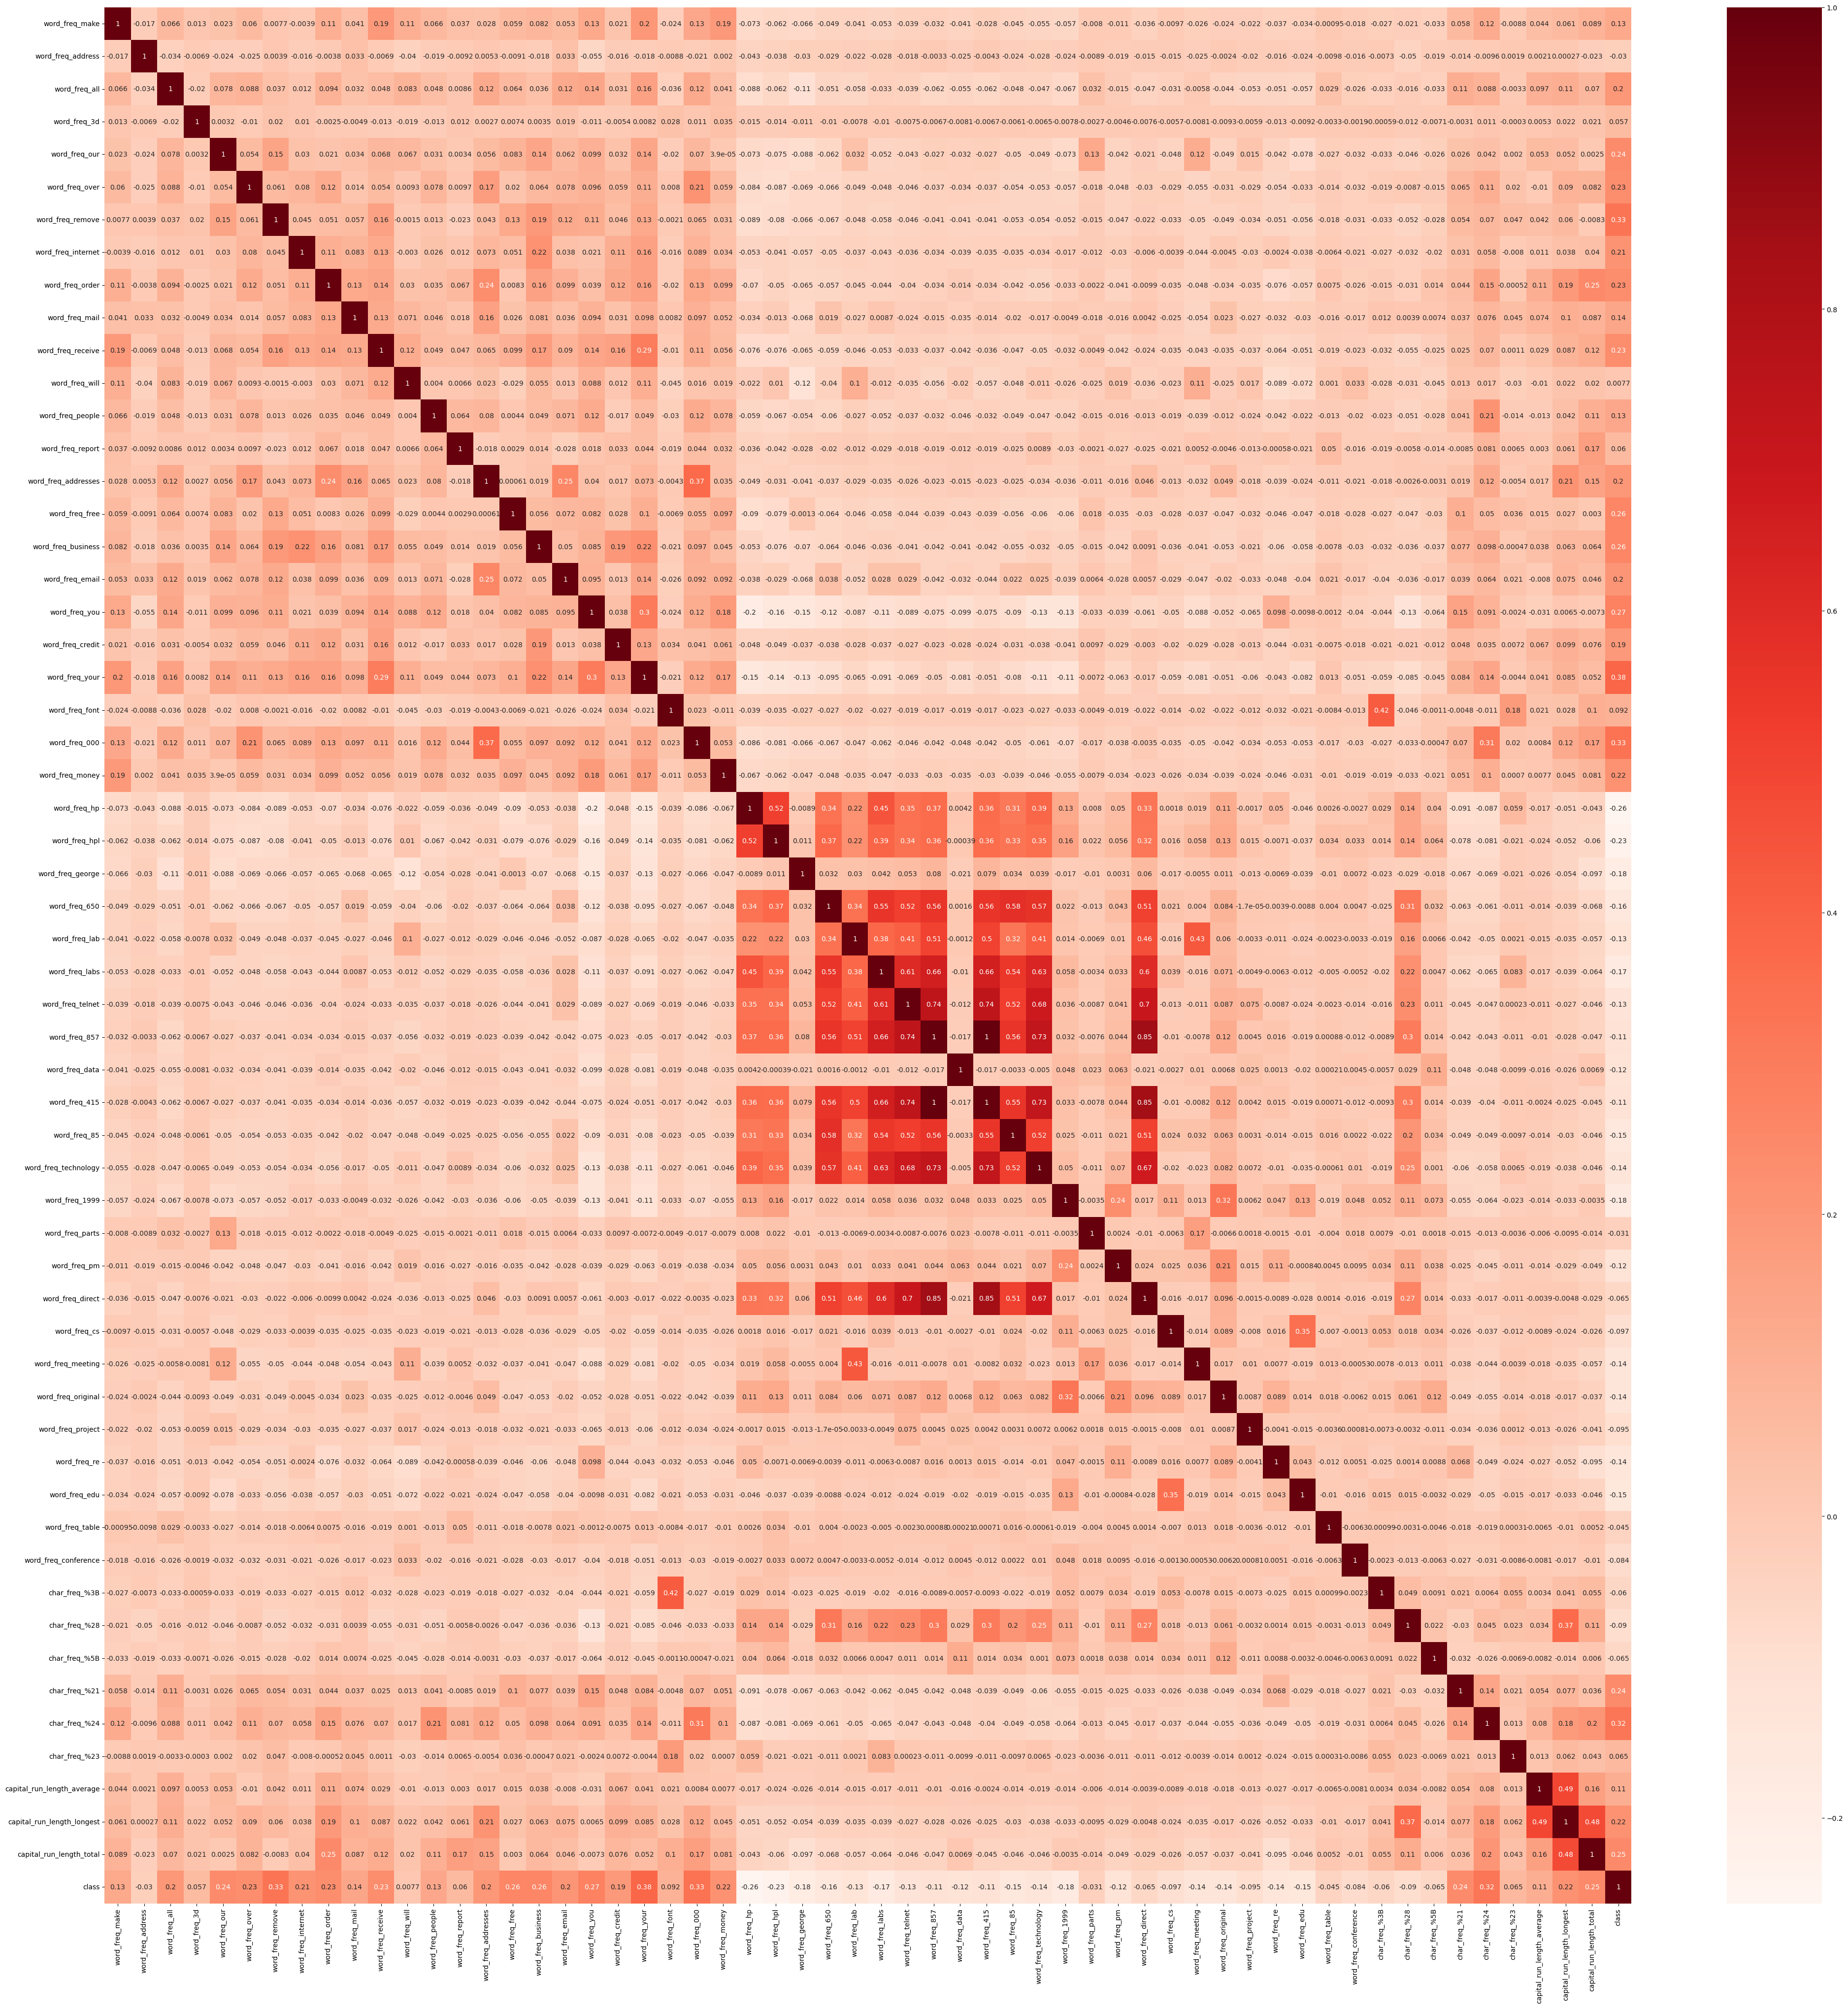

In [13]:
#Correlation Heatmap
corr_matrix = data_set.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr_matrix,cmap='Reds',annot=True)

In [170]:

X = data_set.drop(['class'],axis=1)
y = data_set['class']

In [172]:
X = data_set.drop(['class'],axis=1)
y = data_set['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
print(X_train.shape,X_test.shape)

(3680, 57) (921, 57)


In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_tr= scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)
df_scaled = pd.DataFrame(scaled_tr, columns=X_train.columns)

# Verify the Scaled Data
print("Scaled DataFrame:\n", df_scaled.head())

Scaled DataFrame:
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342782          -0.166019      -0.549932     -0.046946   
1       -0.342782          -0.166019      -0.549932     -0.046946   
2       -0.342782          -0.166019      -0.549932     -0.046946   
3       -0.342782          -0.166019      -0.549932     -0.046946   
4       -0.342782          -0.166019       1.006830     -0.046946   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0      -0.460585       -0.365906         -0.302234           -0.257658   
1      -0.460585       -0.365906         -0.302234           -0.257658   
2      -0.460585       -0.365906         -0.302234           -0.257658   
3       3.073756       -0.365906         -0.302234           -0.257658   
4      -0.074481       -0.365906          0.395302            0.382406   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_%3B  \
0         -0.32075       -0.372110  ...  

In [126]:
evaluation_metrices = [
    "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-score", 
    "ROC-AUC", "Training Time", "Testing Time" , "mcc","pr_auc","cohen_kappa_score"
]
models = [
    "Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN"
]

df = pd.DataFrame(index=models, columns=evaluation_metrices)

Best k: 3 with average accuracy: 0.8997


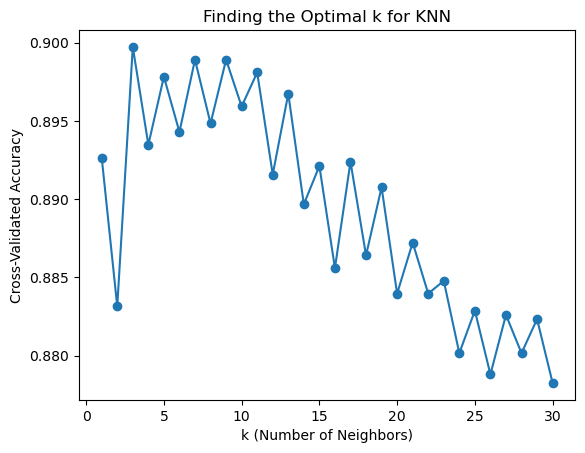

In [18]:
def find_best_k(X_train, y_train, k_range):
    best_k = None
    best_score = 0
    scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_scores)
        scores.append(mean_score)

        if mean_score > best_score:
            best_score = mean_score
            best_k = k

    return best_k, scores
    

k_range = range(1, 31)  # Test k from 1 to 30
best_k, scores = find_best_k(df_scaled, y_train, k_range)
print(f"Best k: {best_k} with average accuracy: {max(scores):.4f}")

plt.plot(k_range, scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal k for KNN')
plt.show()

In [19]:
model_dict = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True) , # Ensure SVM supports probabilities 
    "KNN": KNeighborsClassifier(n_neighbors=best_k)
}

In [128]:
for model_name, model in model_dict.items():
    start_train = time.time()
    model.fit(df_scaled, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = model.predict(scaled_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    end_test = time.time()

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    mcc = matthews_corrcoef(y_test, y_pred)
    precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall2, precision2)
    kappa = cohen_kappa_score(y_test, y_pred)


    training_time = end_train - start_train
    testing_time = end_test - start_test

    # Store results
    df.loc[model_name] = [
        f"{acc:.4f}",
        f"{balanced_acc:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}",
        f"{f1:.4f}",
        f"{roc_auc}" if roc_auc != "N/A" else "N/A",
        f"{training_time:.4f} s",
        f"{testing_time:.4f} s" , 
        f"{mcc:.4f}",
        f"{pr_auc:.4f}" if pr_auc != "N/A" else "N/A",
        f"{kappa:.4f}"
    ]

    # Save model
    joblib.dump(model, f"{model_name.replace(' ', '_').lower()}_model.pkl")

# Save to Excel
df.to_excel("model_evaluation_metrices_.xlsx", index=True)
print(df)

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                    Accuracy Balanced Accuracy Precision  Recall F1-score  \
Logistic Regression   0.9370            0.9321    0.9294  0.9088   0.9190   
Decision Tree         0.9294            0.9292    0.8960  0.9282   0.9118   
Random Forest         0.9653            0.9616    0.9661  0.9448   0.9553   
SVM                   0.9522            0.9465    0.9569  0.9199   0.9380   
KNN                   0.9294            0.9258    0.9114  0.9088   0.9101   

                                 ROC-AUC Training Time Testing Time     mcc  \
Logistic Regression   0.7438722462171004      0.0487 s     0.0058 s  0.8676   
Decision Tree        0.31254756421787133      0.0904 s     0.0100 s  0.8534   
Random Forest          0.958793326678461      1.0586 s     0.0400 s  0.9270   
SVM                  0.34912877178070545      2.8427 s     0.4015 s  0.8996   
KNN                   0.6047055218968362      0.0100 s     0.2723 s  0.8520   

                     pr_auc cohen_kappa_score  
Logistic Regre

In [138]:
def compute_metrics(y_test, y_pred, y_pred_proba, model_name, training_time, testing_time, description):
    # Define file name
    file_name = f"model_evaluation_metrices_{description}.xlsx"

    # Check if the file exists; if not, initialize a DataFrame
    if os.path.exists(file_name):
        df = pd.read_excel(file_name, index_col=0)
    else:
        columns = [
            "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1 Score", 
            "ROC AUC", "Training Time", "Testing Time", "MCC", "PR AUC", "Cohen's Kappa"
        ]
        df = pd.DataFrame(columns=columns)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Precision-Recall curve metrics
    precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall2, precision2)

    # Cohen's Kappa score
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results with explicit casting for numeric columns
    df.loc[model_name] = [
        round(acc, 4),  # Cast to float
        round(balanced_acc, 4),  # Cast to float
        round(precision, 4),  # Cast to float
        round(recall, 4),  # Cast to float
        round(f1, 4),  # Cast to float
        float(f"{roc_auc:.4f}") if roc_auc != "N/A" else "N/A",  # Ensure float or "N/A"
        f"{training_time:.4f} s",  # Keep as string
        f"{testing_time:.4f} s",  # Keep as string
        round(mcc, 4),  # Cast to float
        float(f"{pr_auc:.4f}") if pr_auc != "N/A" else "N/A",  # Ensure float or "N/A"
        round(kappa, 4),  # Cast to float
    ]

    print(model_name)
    print(df.loc[model_name])
    # Save the updated DataFrame to Excel
    df.to_excel(file_name, index=True, engine="openpyxl")

In [22]:
def build_neural_network(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),  # Prevent overfitting
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [176]:
# Add Neural Network to the process
def nn(X_train, X_test, y_train, y_test, description):
    start_train = time.time()
    input_dim = df_scaled.shape[1]  # Number of features
    nn_model = build_neural_network(input_dim)
    nn_model.fit(df_scaled, y_train, epochs=1000, batch_size=64, verbose=0 , validation_split=0.2, callbacks=[early_stopping])
    end_train = time.time()
    
    start_test = time.time()
    y_pred_proba = nn_model.predict(scaled_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)
    end_test = time.time()
    
    compute_metrics(y_test,y_pred,y_pred_proba,"Neural Network", training_time,testing_time,description)

    joblib.dump(model, f"NN__model{description}.pkl")

    
nn(df_scaled, scaled_test, y_train, y_test,'')

D:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Neural Network
Accuracy               0.9555
Balanced Accuracy      0.9521
Precision              0.9496
Recall                 0.9365
F1-score                0.943
ROC-AUC                0.9862
Training Time        0.0000 s
Testing Time         0.2736 s
mcc                    0.9065
pr_auc                 0.9768
cohen_kappa_score      0.9065
Name: Neural Network, dtype: object


In [178]:
def rnn(data_set, description):
    rnn_dataset = data_set
    rnn_dataset = rnn_dataset.drop(['word_freq_415'], axis=1)
    
    X = rnn_dataset.drop(['class'], axis=1).values
    y = rnn_dataset['class'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    model = Sequential([
        LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    start_train = time.time()
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))
    end_train = time.time()
    
    start_test = time.time()
    y_pred_proba = model.predict(X_test_reshaped).flatten()
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    end_test = time.time()
    
    compute_metrics(y_test,y_pred,y_pred_proba,"RNN", training_time,testing_time, description)
    joblib.dump(model, f"RNN__model{description}.pkl")
    
rnn(data_set, '') 

Epoch 1/100


D:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6913 - loss: 0.6320 - val_accuracy: 0.9142 - val_loss: 0.3609
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9126 - loss: 0.3186 - val_accuracy: 0.9403 - val_loss: 0.1986
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9258 - loss: 0.2102 - val_accuracy: 0.9435 - val_loss: 0.1689
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9313 - loss: 0.1869 - val_accuracy: 0.9468 - val_loss: 0.1539
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9294 - loss: 0.1745 - val_accuracy: 0.9511 - val_loss: 0.1463
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9378 - loss: 0.1642 - val_accuracy: 0.9522 - val_loss: 0.1400
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9402 - loss: 0.1614 - val_accuracy: 0.9544 - val_loss: 0.1371
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9466 - loss: 0.1471 - val_accuracy: 0.9522 - val_loss: 0.

In [180]:
def cnn(data_set, description):
    cnn_dataset = data_set
    X = cnn_dataset.drop(['class'], axis=1) 
    y = cnn_dataset['class']  
    
    scaler = StandardScaler()                                  
    X_scaled = scaler.fit_transform(X)
    
    num_features = X.shape[1]
    n = int(np.ceil(np.sqrt(num_features)))  
    X_reshaped = np.zeros((X_scaled.shape[0], n, n, 1)) 
    
    for i in range(X_scaled.shape[0]):
        temp = np.zeros((n * n,))
        temp[:num_features] = X_scaled[i]
        X_reshaped[i] = temp.reshape((n, n, 1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=10)
    
    model = Sequential([
        Input(shape=(n, n, 1)),  
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(1, activation='sigmoid')  
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    start_train = time.time()
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)
    end_train = time.time()
    
    start_test = time.time()
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    end_test = time.time()
    
    compute_metrics(y_test,y_pred,y_pred_proba,"CNN", training_time,testing_time, description)
    joblib.dump(model, f"CNN__model{description}.pkl")
    
cnn(data_set,'')

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6917 - loss: 0.5929 - val_accuracy: 0.8573 - val_loss: 0.3468
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8768 - loss: 0.3276 - val_accuracy: 0.9062 - val_loss: 0.2796
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9036 - loss: 0.2731 - val_accuracy: 0.9130 - val_loss: 0.2588
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9172 - loss: 0.2173 - val_accuracy: 0.9103 - val_loss: 0.2412
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9337 - loss: 0.1976 - val_accuracy: 0.9076 - val_loss: 0.2515
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9222 - loss: 0.2205 - val_accuracy: 0.9171 - val_loss: 0.2280
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9327 - loss: 0.1790 - val_accuracy: 0.9130 - val_loss: 0.2075
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9322 - loss: 0.1940 - val_accuracy: 0.

# Now we will apply Particles Swarm (PSO) Feature Selection Algorithm
### then comopare the models efficiency to those before feature selection

In [182]:
from sklearn.model_selection import cross_val_score
from pyswarms.single.global_best import GlobalBestPSO

X = data_set.drop(['class'],axis=1)
y = data_set['class']

In [28]:
# Objective Function: Accuracy with Feature Subset

def objective_function(swarm_positions):
    costs = []  # Store costs for all particles
    for mask in swarm_positions:  
        mask = np.round(mask).astype(bool) 
        if np.sum(mask) == 0:  
            costs.append(1.0)  
            continue
        X_subset = X.iloc[:, mask]  
        clf = RandomForestClassifier()
        scores = cross_val_score(clf, X_subset, y, cv=5)
        costs.append(1 - scores.mean())  
    return np.array(costs)

In [29]:
# Get the number of features
n_features = X.shape[1]

# PSO Configuration
n_features = X.shape[1]  # Total number of features
options = {'c1': 2, 'c2': 2, 'w': 0.7}
optimizer = GlobalBestPSO(n_particles=10, dimensions=n_features, options=options)

# Run PSO Optimization
cost, pos = optimizer.optimize(objective_function, iters=30)

# Selected Features
selected_features = np.round(pos).astype(bool)
print("Selected Features:", selected_features)

# Display Selected Feature Names
selected_columns = X.columns[selected_features]
print("Selected Feature Names:", selected_columns)

2024-12-18 01:56:53,669 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 2, 'c2': 2, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=0.0667
2024-12-18 02:09:36,457 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.06672732851815133, best pos: [ 3.79443179  0.70599021 -0.35070057  2.09887213  2.3521971   0.77631879
  1.14069011  3.00844124 -3.75570261  0.55776348 -2.07910152  3.45168256
  0.20110613  1.23569296  1.86505562  1.33065833  1.78041746  0.26414059
  2.10874534 -0.34248933 -0.77472709  1.63534359  2.0055626   1.5674201
  1.44901185  1.0654051   0.54722696 -0.96017551  2.18247088  1.53645405
  3.15716899  0.68491289  1.36432747  0.70387545  0.63340453  0.16081294
  1.87713315  1.56261688  1.08435295  1.76361496 -0.21620671  0.92349383
  1.30027429  2.00373919  2.18097814  7.45074902  2.02775475 -0.41411245
  0.40090276  1.11627553  0.91778165  3.15531005  0.58537743  0.87268525
  4.9245731   1.05607552  0

Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True False  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True False]
Selected Feature Names: Index(['word_freq_make', 'word_freq_address', 'word_freq_3d', 'word_freq_our',
       'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_receive',
       'word_freq_will', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_you',
       'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
       'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
       'word_freq_data', 'word_

In [184]:
#Dataset with Selected Features
X_selected = X.loc[:, selected_columns]
X_selected.shape

(4601, 48)

In [186]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.2, random_state=10)
print(X_train.shape,X_test.shape)

scaler = StandardScaler()
scaled_selected_train= scaler.fit_transform(X_train)
scaled_selected_test = scaler.transform(X_test)


(3680, 48) (921, 48)


In [158]:
# Retrain Model with Selected Features
for model_name, model in model_dict.items():
    start_train = time.time()
    model.fit(scaled_selected_train, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = model.predict(scaled_selected_test)
    y_pred_proba = model.predict_proba(scaled_selected_test)[:, 1] if hasattr(model, "predict_proba") else None
    end_test = time.time()

 # Metrics
    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    mcc = matthews_corrcoef(y_test, y_pred)
    precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall2, precision2)
    kappa = cohen_kappa_score(y_test, y_pred)


    training_time = end_train - start_train
    testing_time = end_test - start_test

    # Store results
    df.loc[model_name] = [
        f"{acc:.4f}",
        f"{balanced_acc:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}",
        f"{f1:.4f}",
        f"{roc_auc}" if roc_auc != "N/A" else "N/A",
        f"{training_time:.4f} s",
        f"{testing_time:.4f} s" , 
        f"{mcc:.4f}",
        f"{pr_auc:.4f}" if pr_auc != "N/A" else "N/A",
        f"{kappa:.4f}"
    ]

    # Save model
    joblib.dump(model, f"{model_name.replace(' ', '_').lower()}_model_after_feature_selection.pkl")

# Save to Excel
df.to_excel("model_evaluation_metrices_after_feature_selection.xlsx", index=True)
print(df)

                    Accuracy Balanced Accuracy Precision  Recall F1-score  \
Logistic Regression   0.9370            0.9311    0.9343  0.9033   0.9185   
Decision Tree         0.9435            0.9394    0.9354  0.9199   0.9276   
Random Forest         0.9620            0.9580    0.9632  0.9392   0.9510   
SVM                   0.9435            0.9369    0.9480  0.9061   0.9266   
KNN                   0.9359            0.9326    0.9197  0.9171   0.9184   

                                ROC-AUC Training Time Testing Time     mcc  \
Logistic Regression  0.9790223267674122      0.0404 s     0.0010 s  0.8676   
Decision Tree        0.9383691279811028      0.0681 s     0.0000 s  0.8814   
Random Forest        0.9870971248974592      0.7051 s     0.0471 s  0.9202   
SVM                  0.9810929145376017      2.3583 s     0.3763 s  0.8813   
KNN                  0.9618572035699107      0.0000 s     0.2736 s  0.8657   

                     pr_auc cohen_kappa_score  
Logistic Regression 

# Now Run the NN, CNN and RNN on the new features (after feature selection)

In [188]:
nn(scaled_selected_train, scaled_selected_test, y_train, y_test, 'after_feature_selection')

D:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network
Accuracy               0.9577
Balanced Accuracy      0.9564
Precision              0.9425
Recall                 0.9503
F1-score               0.9464
ROC-AUC                 0.989
Training Time        0.0000 s
Testing Time         0.2736 s
mcc                    0.9114
pr_auc                 0.9795
cohen_kappa_score      0.9114
Name: Neural Network, dtype: object


In [190]:

combined_df = pd.concat([X_selected, y], axis=1)

In [192]:
cnn(combined_df, 'after_feature_selection')


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6931 - loss: 0.5874 - val_accuracy: 0.8451 - val_loss: 0.3818
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8547 - loss: 0.3664 - val_accuracy: 0.8927 - val_loss: 0.3102
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9057 - loss: 0.2717 - val_accuracy: 0.9117 - val_loss: 0.2734
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9098 - loss: 0.2488 - val_accuracy: 0.9130 - val_loss: 0.2739
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9317 - loss: 0.2148 - val_accuracy: 0.9226 - val_loss: 0.2543
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9213 - loss: 0.2297 - val_accuracy: 0.9090 - val_loss: 0.2498
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9218 - loss: 0.2096 - val_accuracy: 0.9144 - val_loss: 0.2421
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9337 - loss: 0.1851 - val_accuracy: 0.

In [194]:
rnn(combined_df, 'after_feature_selection')

Epoch 1/100


D:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7832 - loss: 0.6196 - val_accuracy: 0.9055 - val_loss: 0.3433
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9139 - loss: 0.3051 - val_accuracy: 0.9262 - val_loss: 0.1996
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9284 - loss: 0.2112 - val_accuracy: 0.9435 - val_loss: 0.1721
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9252 - loss: 0.2021 - val_accuracy: 0.9457 - val_loss: 0.1584
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9416 - loss: 0.1723 - val_accuracy: 0.9501 - val_loss: 0.1517
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9396 - loss: 0.1732 - val_accuracy: 0.9522 - val_loss: 0.1477
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9417 - loss: 0.1636 - val_accuracy: 0.9522 - val_loss: 0.1426
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9477 - loss: 0.1499 - val_accuracy: 0.9479 - val_loss: 0.